<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
    <img src="../imagenes/Foto Alvaro Montenegro.png" width="40" height="40" align="right" /> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Simposio Internacional de Estadística 2024</center></span>

## <span style="color:green"><center>Minicurso de Inteligencia Artificial Moderna - Sesión III<center></span>

### <span style="color:green"><center>Modelos Generativos - GANs<center></span>

<figure>
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/8/82/%D0%9D%D0%B0%D0%B9%D0%BA%D1%80%D0%B0%D1%89%D1%96_%D0%BC%D0%B8%D1%82%D1%96_%D0%B6%D0%B8%D1%82%D1%82%D1%8F.jpg width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Rhododendron flowers in the Carpathian Mountains</p>
</figcaption>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:%D0%9D%D0%B0%D0%B9%D0%BA%D1%80%D0%B0%D1%89%D1%96_%D0%BC%D0%B8%D1%82%D1%96_%D0%B6%D0%B8%D1%82%D1%82%D1%8F.jpg">Misha Reme</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons



# <span style="color:#4361EE">Profesor</span>

## <span style="color:#4361EE">Alvaro  Mauricio Montenegro Díaz, Ph.D.</span>

## <span style="color:blue">Referencias</span>

1. [Rowel Atiesa, Advanced Deep Learning with Tensorflow 2 and Keras, second ed., Pack, 2020](https://www.oreilly.com/library/view/advanced-deep-learning/9781838821654/)
1. [Ejemplos de Keras](https://keras.io/examples/generative/dcgan_overriding_train_step/)
1. [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)
1. [Soumith, How to Train a GAN? Tips and tricks to make GANs workHow to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks/blob/master/README.mdhttps://github.com/soumith/ganhacks/blob/master/README.md), in Github.

# <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Preliminares](#Preliminares)
* [Componentes de una GAN](#Componentes-de-una-GAN)

# <span style="color:blue">Introducción</span>


Las redes generativas adversarias (GAN) son una de las más interesantes ideas de la inteligencia artificial hoy en día. Dos modelos son entrenados simultáneamente por un proceso adversario. 

Un `generador` ( "el artista") aprende a crear imágenes que parecen reales, mientras que un `discriminador` ( "el crítico de arte") aprende a decidir si las imágenes son reales o no.

El propósito del entrenamiento es que el generador aprenda a crear imágenes de tal calidad que el discriminador no logre diferenciar si son reales o `falsificaciones`. 

En  paralelo, el discriminador se vuelve el mejor en detectar falsificaciones. Las GAN fueron propuestas por [Ian Goodfellow](https://en.wikipedia.org/wiki/Ian_Goodfellow), estudiante de doctorado de [Yoshua BengioYoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio).

La siguiente imagen tomada de los tutoriales de Google, ilustra los principales elementos que se requieren para construir una GAN. 

<figure>
<center>
<img src="../Imagenes/gan1.png" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Generador y discriminador de una GAN </p>
</figcaption>
</figure>

Fuente: [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)

Durante el entrenamiento, el generador se vuelve progresivamente cada vez más capaz de crear imágenes que parecen reales, mientras que el discriminador se convierte en el mejor para distinguirlas. Se alcanza una situación  de equilibrio cuando el discriminador ya no puede distinguir imágenes reales de los falsos.

<figure>
<center>
<img src="../Imagenes/gan2.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">GAN en acción </p>
</figcaption>
</figure>

Fuente: [Tutoriales-Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)

En esta lección también veremos como generar imágenes de caras usando una red generativa adversaria convolucional (DCGAN), lacual es na evolución de las GAN's clásicas. 

Utilizaremos un subconjunto del conjunto de datos de imágenes de celebridades [CelebFaces Attributes (CelebA) Dataset](https://www.kaggle.com/jessicali9530/celeba-dataset) disponible en Kaggle. CelebA tiene más de 200k imágenes de celebridades con 40 anotaciones de tipo binario. Nos hemos basado en el código de F. Chollet, el creador de Keras.

# <span style="color:blue">Concepto básicos de las GANs</span>

## <span style="color:blue">Componentes</span>

Las GANs consisten en dos redes neuronales que compiten entre sí en un juego de suma cero. Estas redes son el Generador y el Discriminador.

1. `Generador (G)`: Intenta crear datos falsos que parezcan reales.
2. `Discriminador (D)`: Intenta distinguir entre los datos reales y los generados por el Generador.


## <span style="color:blue">Generador</span>

El Generador toma como entrada un vector de ruido, generalmente una distribución aleatoria, y lo transforma en datos que intentan parecerse a los datos reales. La idea es que el Generador aprenda a mapear el espacio de ruido a la distribución de datos reales.

1. `Entrada`: Vector de ruido $z$.
2. `Salida`: Datos sintéticos generados (por ejemplo, imágenes).



El siguiente fragmento muestra cómo se podría construir una red generadora clásica con Tensorflow. El ejemplo se podría utilizar para generar imagenes de Mnist o Fashion Mnist. Observe que se espera a la entrada un vector ($z$) de tamaño 100. A la salida esperariamos una imagen de tamaño $28 \times 28$.

In [7]:
# ejemplo de generador
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Reshape, Flatten, LeakyReLU, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt

def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

generator = build_generator()
generator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

### 

<span style="color:#4CC9F0">Prueba del generador aún no  entrenado</span>

Usamos el generador, todavía no entrenado, para crear una imagen.

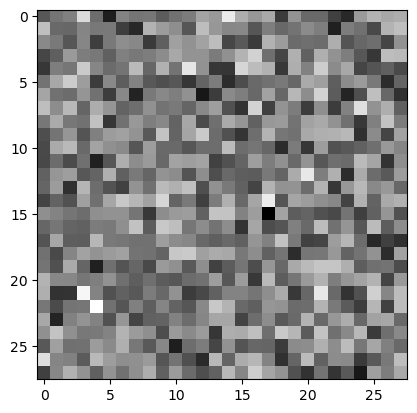

In [9]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### <span style="color:#4CC9F0">Ejercicio</span>

Investigue la definición de la activación *LeakyReLU*. y haga un gráfico.

**Consigne su respuesta aquí**.

**Posible solución**.
La función activación `LeakyReLU` n es definida como sigue:

$$
\text{LeakyReLU}(x) = \begin{cases} x &\text{ si } x>0\\
\alpha x, \hspace{3mm}0 <\alpha < 1 &\text{ si } x\le 0 \end{cases}
$$


## <span style="color:blue">Discriminador</span>

El Discriminador toma como entrada tanto datos reales como datos generados por el Generador y trata de clasificar cada uno como real o falso. En otras palabras, el Discriminador es un clasificador binario.

1. `Entrada`: Datos reales o datos generados.
2. `Salida`: Probabilidad de que los datos sean reales.

El siguiente fragmento muestra cómo se podría construir una red generadora clásica con Tensorflow. El ejemplo se podría utilizar para generar imagenes de Mnist o Fashion Mnist. Observe que se espera a la entrada un vector ($z$) de tamaño 100. A la salida esperariamos una imagen de tamaño $28 \times 28$.

In [12]:
# ejemplo de discriminador
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Reshape, Flatten, LeakyReLU, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt

def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
generator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

### <span style="color:#4CC9F0">Prueba del discriminador no entrenado aún</span>

Utilizamos el discriminador, todavía no entrenado, para clasificar las imágenes generadas como reales o falsas. El modelo se entrenará para generar valores positivos para imágenes reales y valores negativos para imágenes falsas.

In [13]:
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.5858497]], shape=(1, 1), dtype=float32)


## <span style="color:blue">Funcionamiento</span>

1. **Inicialización**: Ambas redes, Generador y Discriminador, se inicializan con pesos aleatorios.
2. **Entrenamiento del Discriminador**:
    * Se presentan al Discriminador muestras reales del conjunto de datos etiquetadas como reales.
    * Se presentan al Discriminador muestras generadas por el Generador etiquetadas como falsas.
    * El Discriminador se entrena para maximizar su precisión en distinguir entre reales y falsos.
3. **Entrenamiento del Generador**:
   * Se genera un lote de datos falsos a partir del Generador.
   * Se pasa este lote al Discriminador pero, en lugar de actualizar los pesos del Discriminador, se actualizan los pesos del Generador.
   * El Generador se entrena para minimizar la capacidad del Discriminador para distinguir entre reales y falsos.
4. **Ciclo de Entrenamiento**:
     * Se alternan los pasos de entrenamiento del Generador y del Discriminador hasta que se alcanza un equilibrio donde el Generador produce datos que el Discriminador no puede distinguir de los datos reales con alta precisión.
  

## <span style="color:blue">Pérdida (Loss)</span>

Las GANs usan una función de pérdida que refleja el objetivo de ambos modelos:

* **Pérdida del Discriminador**: $\log(𝐷(𝑥)) + \log(1−𝐷(𝐺(𝑧)))$
    + $D(x)$ es la probabilidad de que la entrada $x$ sea real.
     + $𝐺(𝑧)$ es la salida del Generador cuando la entrada es $z$ (vector de ruido).
    + El Discriminador trata de maximizar esta función de pérdida.
* **Pérdida del Generador**: $\log(1−D(G(z)))$
    + El Generador trata de minimizar esta función de pérdida.
    + Alternativamente, puede maximizar $\log(D(G(z)))$, lo que a menudo lleva a una convergencia más rápida.

## <span style="color:blue">Beneficios y Desafíos</span>

1. **Beneficios**
    + `Generación de Datos Realistas`: Las GANs pueden generar datos increíblemente realistas, lo cual es útil en aplicaciones como la creación de imágenes, videos y música.
    + `Aprendizaje Sin Supervisión`: Las GANs no requieren etiquetas para el entrenamiento, lo cual es beneficioso cuando no se dispone de grandes conjuntos de datos etiquetados.
2. **Desafíos**
    + Entrenamiento Inestable: Encontrar el equilibrio entre el Generador y el Discriminador puede ser difícil, y el entrenamiento puede ser inestable.
    + `Modo Colapso`: El Generador puede llegar a producir una gama limitada de resultados (colapso del modo), ignorando otras partes de la distribución de datos reales.
    + `Recursos Computacionales`: Las GANs pueden requerir grandes recursos computacionales para entrenarse adecuadamente.


## <span style="color:blue">Variantes de GANs</span>

Las Redes Generativas Adversarias (GANs) han evolucionado significativamente desde su introducción en 2014. A lo largo de los años, se han propuesto varias variantes de GANs para abordar diferentes desafíos y mejorar la estabilidad, calidad y eficiencia del entrenamiento. A continuación, se presentan algunas de las variantes más importantes de GANs:

### <span style="color:#4CC9F0">Deep Convolutional GANs (DCGANs)</span> 

**Descripción**: Introducidas por Alec Radford, Luke Metz y Soumith Chintala en 2015, las DCGANs utilizan redes neuronales convolucionales profundas en lugar de capas densas, lo que mejora significativamente la calidad de las imágenes generadas.

**Características Clave**:
+ Uso de convoluciones en lugar de capas densas.
+ Capas de normalización por lotes (Batch Normalization) para estabilizar el entrenamiento.
+ Funciones de activación LeakyReLU en el Discriminador y ReLU en el Generador.

El siguiente fragmento de código presenta una implementación básica de una DCGAN en Tensorflow, para generar por ejemplo imágenes Mnist o FashionMnist

In [ ]:
def build_generator_dcgan(z_dim):
    model = Sequential()
    model.add(Dense(7*7*256, input_dim=z_dim))
    model.add(Reshape((7, 7, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=5, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=5, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
    return model

def build_discriminator_dcgan():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model


### <span style="color:#4CC9F0">Conditional GANs (cGANs)</span> 

**Descripción**: Propuestas por Mehdi Mirza y Simon Osindero en 2014, las cGANs condicionan tanto al Generador como al Discriminador con información adicional (por ejemplo, etiquetas de clase).

**Características Clave**:
+ Condicionamiento de entrada en el Generador y el Discriminador.
+ Mejor control sobre el tipo de datos generados.

El siguiente fragmento de código presenta una implementación básica de una CGAN en Tensorflow, para generar por ejemplo imágenes Mnist o FashionMnist

In [ ]:
def build_generator_cgan(z_dim, num_classes):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim + num_classes))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

def build_discriminator_cgan(num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1 + num_classes)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model


### <span style="color:#4CC9F0">Wasserstein GANs (WGANs)</span>  

**Descripción**: Introducidas por Martin Arjovsky y sus colegas en 2017, las WGANs utilizan la distancia de Wasserstein como métrica de pérdida, mejorando la estabilidad del entrenamiento y proporcionando una mejor convergencia.

**Características Clave**:

+ Uso de la distancia de Wasserstein en lugar de la pérdida de entropía cruzada.
+ Clipping de pesos para mantener la red dentro de un rango específico.

El siguiente fragmento de código presenta una implementación básica de una Wasserstein en Tensorflow, para generar por ejemplo imágenes Mnist o FashionMnist

In [ ]:
def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

def build_discriminator_wgan():
    model = Sequential()
    model.add(Dense(512, input_dim=784))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1))
    return model

def build_generator_wgan(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model


### <span style="color:#4CC9F0">Least Squares GANs (LSGANs)</span> 

**Descripción**: Propuestas por Xudong Mao y sus colegas en 2016, las LSGANs utilizan una función de pérdida de mínimos cuadrados en lugar de la pérdida de entropía cruzada, lo que puede resultar en gradientes más estables y de mejor calidad.

**Características Clave**:

+ Uso de la pérdida de mínimos cuadrados en lugar de la entropía cruzada.
+ Mejora en la calidad y estabilidad de las imágenes generadas.

El siguiente fragmento de código presenta una implementación básica de una LSGAN en Tensorflow, para generar por ejemplo imágenes Mnist o FashionMnist

In [ ]:
def build_generator_lsgan(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

def build_discriminator_lsgan():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    return model


### <span style="color:#4CC9F0">CycleGAN</span>

**Descripción**: Propuestas por Jun-Yan Zhu y sus colegas en 2017, las CycleGANs permiten el mapeo de imágenes de un dominio a otro sin la necesidad de pares de entrenamiento (por ejemplo, transformar imágenes de caballos en cebras y viceversa).

**Características Clave**:

+ Transformación de imágenes entre dos dominios sin necesidad de pares de datos.
+ Uso de pérdidas de ciclo-consistencia para asegurar que las transformaciones sean reversibles.

El siguiente fragmento de código presenta una implementación básica de una CycleGAN en Tensorflow, para generar por ejemplo imágenes Mnist o FashionMnist

In [ ]:
def build_generator_cyclegan():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=7, padding='same', input_shape=(128, 128, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(Activation('relu'))
    # Varias capas residuales aquí...
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(3, kernel_size=7, padding='same'))
    model.add(Activation('tanh'))
    return model

def build_discriminator_cyclegan():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(128, 128, 3)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(512, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add


## <span style="color:blue">Entrenamiento de las GANs</span>

<figure>
<center>
<img src="../Imagenes/GAN_trainig.png" width="600" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Esquema de entrenamiento de una GAN </p>
</figcaption>
</figure>

El entrenamiento de las Redes Generativas Adversarias (GANs) es un proceso iterativo y competitivo que involucra dos redes neuronales: el Generador y el Discriminador. Aquí desglosamos los pasos clave y las técnicas para entrenar GANs de manera efectiva.

### <span style="color:#4CC9F0">Proceso de Entrenamiento</span> 

El entrenamiento de una GAN implica alternar entre el entrenamiento del Discriminador y el Generador. El objetivo es encontrar un equilibrio donde el Generador produzca datos tan realistas que el Discriminador no pueda diferenciarlos de los datos reales con alta precisión.

**Pasos Detallados**:
1. **Inicialización**:
    1. Inicializa los pesos del Generador y el Discriminador.
    2. Establece los hiperparámetros, como la tasa de aprendizaje, el tamaño del lote, y el número de épocas.

2. **Entrenamiento del Discriminador**:

    1. Toma un lote de datos reales del conjunto de datos y genera un lote de datos falsos utilizando el Generador.
    2. Calcula la pérdida del Discriminador en los datos reales y falsos.
    3. Actualiza los pesos del Discriminador para maximizar su capacidad de distinguir entre datos reales y falsos.

3. **Entrenamiento del Generador**:

+ Genera un lote de datos falsos a partir de un vector de ruido.
+ Pasa estos datos falsos al Discriminador, pero no actualiza los pesos del Discriminador.
+ Calcula la pérdida del Generador basada en la capacidad del Discriminador para clasificar los datos falsos como reales.
+ Actualiza los pesos del Generador para minimizar la capacidad del Discriminador de diferenciar entre datos reales y falsos.

4. **Repetición**:

+ Repite los pasos anteriores durante varias épocas hasta que la GAN alcance un equilibrio y el Generador produzca datos realistas.

### <span style="color:#4CC9F0">Funciones de Pérdida</span> 

Las funciones de pérdida juegan un papel crucial en el entrenamiento de las GANs. Las funciones de pérdida comunes incluyen: 

**Pérdida del Discriminador**
+  $L_D = −\mathbb{E}[\log D(x)]−\mathbb{E}[\log(1−D(G(z)))]$
**Pérdida del Discriminador**
+ $L_G =−E[logD(G(z))]$

 
En WGANs, se usa la distancia de Wasserstein:

c:
$L_D =  =E[D(x)]−E[D(G(z))]$

 
+ **Pérdida del Generador**
+ $L_D  =−E[D(G(z))]$

### <span style="color:#4CC9F0">Técnicas de Mejora del Entrenamiento</span> 

**Normalización de Lotes (Batch Normalization)**

La normalización de lotes se usa para estabilizar el entrenamiento y acelerar la convergencia. Se aplica a las capas del Generador y el Discriminador.


In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Ejemplo en una capa del Generador
model.add(Dense(256, input_dim=z_dim))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(alpha=0.2))


**Clipping de Pesos**

En WGANs, se recortan los pesos del Discriminador para mantener la estabilidad del entrenamiento.

In [ ]:
for layer in discriminator.layers:
    weights = layer.get_weights()
    weights = [np.clip(w, -0.01, 0.01) for w in weights]
    layer.set_weights(weights)


**Uso de Optimizadores**

Adam es un optimizador comúnmente utilizado por su capacidad para adaptarse a diferentes tasas de aprendizaje.

In [ ]:
from tensorflow.keras.optimizers import Adam

generator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


**Entrenamiento Alternado**

Es crucial alternar entre el entrenamiento del Generador y el Discriminador para asegurar que ambos mejoren simultáneamente.

In [ ]:
epochs = 10000
batch_size = 64
sample_interval = 1000

for epoch in range(epochs):
    # Entrenamiento del Discriminador
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, z_dim))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Entrenamiento del Generador
    noise = np.random.normal(0, 1, (batch_size, z_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Progreso
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")
        save_images(epoch, generator)


**Evaluación del Desempeño**

Evaluar el desempeño de las GANs puede ser complicado debido a la naturaleza generativa de las redes. Algunas métricas y técnicas comunes incluyen:

+ `Frechet Inception Distance (FID)`: Mide la distancia entre las distribuciones de características extraídas de las imágenes reales y generadas usando una red de clasificación preentrenada (por ejemplo, Inception Network).
+ `Inception Score (IS)`: Evalúa la calidad y diversidad de las imágenes generadas basándose en las predicciones de una red de clasificación preentrenada.
  
**Generación y Visualización de Imágenes**

Guardar y visualizar imágenes generadas durante el entrenamiento es útil para monitorear el progreso del Generador.

In [ ]:
def save_images(epoch, generator, z_dim=100, examples=16, dim=(4, 4), figsize=(10, 10)):
    noise = np.random.normal(0, 1, (examples, z_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


Redefinir el paso de entrenamiento es el principal ingrediente de las GAN. Se siguen los siguientes pasos:


1.  A la entrada la función recibe, como siempre ocurre, un lote (batch) de imágenes de entrenamiento reales.
1. Genera un lote (batch) de puntos aleatorios del mismo tamaño del lote de entrada a la función.  Supongamos que el tamaño del espacio latente de representación es de tamaño $n$. Entonces genera un lotes de observaciones usando la distribución normal multivariada estándar $\mathfrak{N}_n(\boldsymbol{0},\boldsymbol{I})$.
1. Con el lote de aleatorios usa el generador para generar un lote de imágenes falsas.
1. Combina (concatena) los dos lotes: imágenes falsas generadas e imágenes reales.
1.  Etiqueta todas las imágenes, discriminado las reales de las falsas.
1. Agrega ruido aleatorio a las etiquetas: ¡truco importante!. Esto hará que el discriminador reciba de vez en cuando información totalmente cambiada. En particular algunas etiquetas falsas se verán como verdaderas y viceversa. Se pretende con esto engañar al discriminador. Revise la siguiente imagen.
1. Entrena al discriminador. Se pasan las imágenes combinadas al discriminador para que prediga las respectivas etiquetas. Con estas predicciones se calcula la pérdida del discriminador y se actualizan sus pesos (parámetros). El generador permanece ajeno a este proceso.
1. Genera un nuevo lote de aleatorios como se hizo arriba.
1. Etiqueta todas esta imágenes  diciendo que todas son "imágenes reales"
1. Entrena el generador (tenga en cuenta que **no** debemos actualizar los pesos del discriminador en este paso). Los aleatorios son pasados por el generador y entregados al discriminador, el cual hace la predicción. La función de pérdida del generador hace el mismo trabajo que hace la función de pérdida del discriminador (*entropía cruzada*), pero aquí las etiquetas de las imágenes falsas se colocaron como verdaderas, obligando al generador a hacer mejor el trabajo de falsificación.
1. Eso es todo. Al final se re-calculan las métricas y se retornan.

<figure>
<center>
<img src="../Imagenes/gan_training2.png" width="400" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Entradas al discriminador </p>
</figcaption>
</figure>

Fuente [Soumith, How to Train a GAN? Tips and tricks to make GANs workHow to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks/blob/master/README.mdhttps://github.com/soumith/ganhacks/blob/master/README.md), in Github.